Special thanks to [lixiangchun](https://github.com/lixiangchun) and his [extract_image_patches.py](https://github.com/lixiangchun/mynotebook/blob/master/machine_learning/extract_image_patches.py)

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [49]:
#read raw data
img_path = '201703-orig-healthy-plate-949x534.jpg'
img_raw = tf.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=2522, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x0...


In [50]:
#decode into an image tensor
img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

(534, 949, 3)
<dtype: 'uint8'>


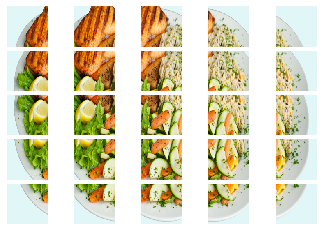

In [51]:
#resize image
img_final = tf.image.resize_images(img_tensor, [300, 300])
img_final = img_final/255.0
#print(img_final.shape)
#print(img_final.numpy().min())
#print(img_final.numpy().max())


#parameters of kernels and strides
ksize_rows = 100
ksize_cols = 100
strides_rows = 50
strides_cols = 50

# The size of sliding window
ksizes = [1, ksize_rows, ksize_cols, 1] 

# How far the centers of 2 consecutive patches are in the image
strides = [1, strides_rows, strides_cols, 1]

rates = [1, 1, 1, 1]

# padding algorithm to used
padding='VALID' # or 'SAME'

#extract patches
img_final = tf.expand_dims(img_final, axis = 0)
image_patches = tf.extract_image_patches(img_final, ksizes, strides, rates, padding)

# get dimensions of grid shape of image patches
rows, cols = image_patches.get_shape().as_list()[1:3]

#prepare grid for patches
fig = plt.figure()
gs = gridspec.GridSpec(rows, cols)
gs.update(wspace = .01, hspace = .1)

#show patches
for i in range(rows):
  for j in range(cols):
    ax = plt.subplot(gs[i*cols+j])
    plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('auto')
    patch = tf.reshape(image_patches[0, i, j, ], [ksize_rows, ksize_cols, 3])
    plt.imshow(patch)
    #print('Processed {},{} patch, {}.'.format(i, j , i*cols+j))

